# Predicting the Survival of Titanic Passengers

### Titanic / Data Preprocessing¶

In [69]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

df=pd.read_csv("titanic (1).csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
#count the number of columns and rows in the data set
df.shape

(891, 12)

In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
#Finding missing values:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
print(df["Age"].head())
print(df["Age"].head().isnull())


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64
0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool


In [76]:
#The total number of missing values
df.isnull().sum().sum()


866

In [77]:
df=df.drop("Cabin",axis=1)

In [78]:
df=df.drop("PassengerId",axis=1)

In [79]:
df=df.drop("Ticket",axis=1)

In [80]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [81]:
#Replacing missing numerical values:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [82]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [83]:
df['Embarked'].fillna('S',inplace=True)

### Titanic / Data Visualization :

<AxesSubplot:title={'center':'Survival count plot'}, xlabel='Survived', ylabel='count'>

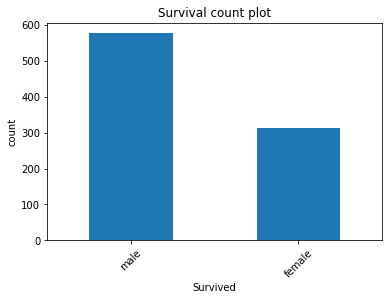

In [84]:
#Titanic Survival count plot
plt.xlabel("Survived")
plt.ylabel("count")
plt.title("Survival count plot")
vc=df["Sex"].value_counts()
vc.plot.bar(rot=45)




<AxesSubplot:title={'center':'Bar plot of Gender'}, xlabel='Sex', ylabel='count'>

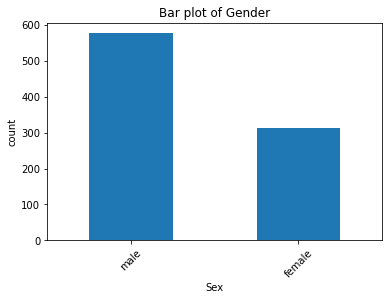

In [85]:
#Gender distribuation
plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Bar plot of Gender")
vc=df["Sex"].value_counts()
vc.plot.bar(rot=45)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

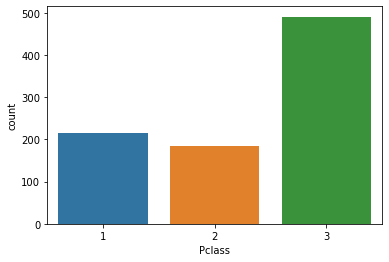

In [86]:
#Class Distribution 
sns.countplot(x='Pclass',data=df)


<AxesSubplot:xlabel='Embarked', ylabel='count'>

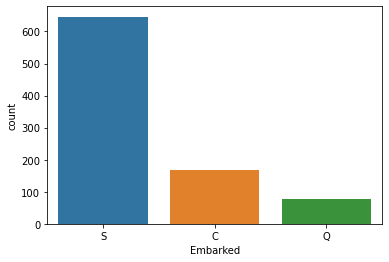

In [87]:
#Embarked:
sns.countplot(x='Embarked' ,data=df)


<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

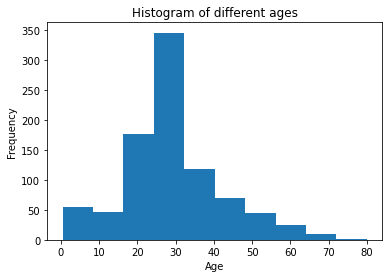

In [88]:
#Age distribution of passenger

plt.title("Histogram of different ages")
plt.xlabel("Age")
df["Age"].plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

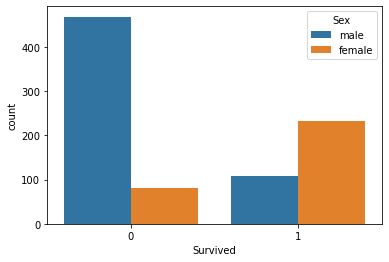

In [89]:
#Visualize survived with sex
sns.countplot(x='Survived',hue='Sex',data=df)


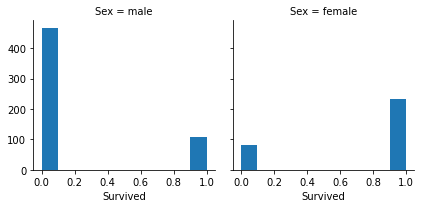

In [90]:
#Visualize survived with sex
g=sns.FacetGrid(df, col='Sex')
g.map(plt.hist, 'Survived', bins=10)


There is a higher number of female survivors than male

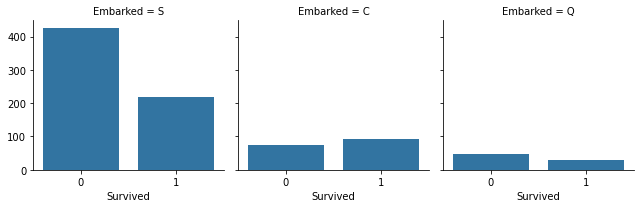

In [91]:
#Visualize survived with Embarked
g=sns.FacetGrid(df,col='Embarked')
g.map(sns.countplot, 'Survived')

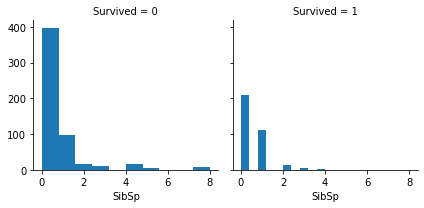

In [92]:
#Visualize Survived with SibSp
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist, 'SibSp',bins=10)

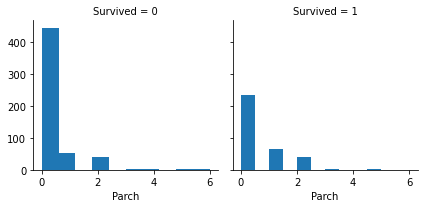

In [93]:
##Visualize Survived with Parch
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist, 'Parch',bins=10)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

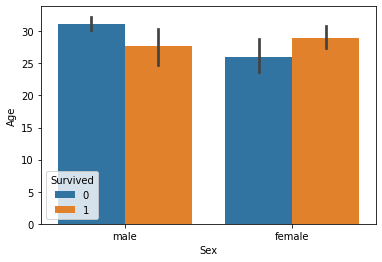

In [94]:
#The importance of age and Sex in the survival of the individuals

sns.barplot(data=df, x='Sex', y='Age', hue ='Survived')



<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

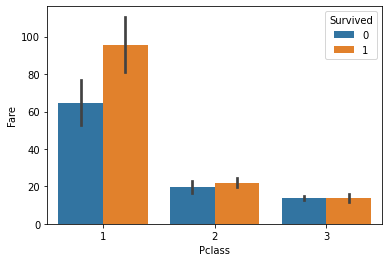

In [95]:
#The relationship between the passenger class, fare paid, and survival
sns.barplot(data=df, x='Pclass', y='Fare', hue ='Survived')

Passengers of a higher class are more likely to survive

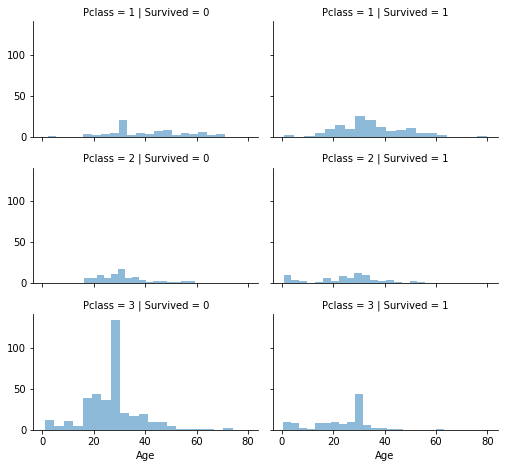

In [96]:
g = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend();




The plot above confirms a high probability that a person in pclass 3 will not survive.

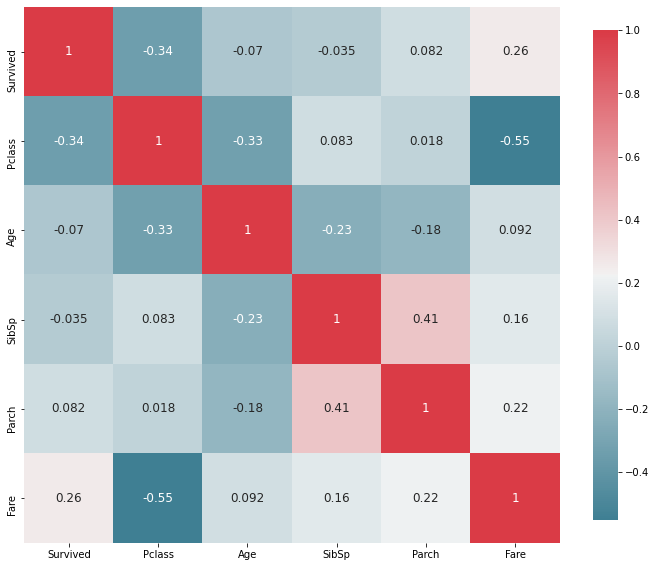

In [97]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)



The heatmap shows us the correlation between the variables in the data set.
'SibSp' and 'Parch' have a positive correlation
'Survived' and 'Fare' have a positive correlation


In [98]:
#Extract 'Title' from 'Name' and convert to Numerical values
#Label encoder for this example ??????
df=pd.read_csv("titanic (1).csv")
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df = df.drop(columns='Name')

df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')

df['Title'] = df['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


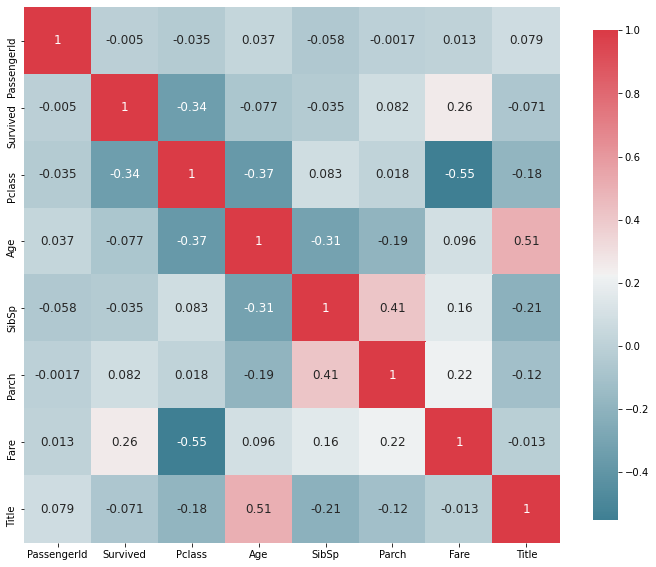

In [99]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)



In [100]:
#transformation(Categorical encoding using One-Hot-Encoder)
x = pd.get_dummies(df["Sex"])
df=df.drop("Sex", axis = 1) 
df=df.join(x) 
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,female,male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,3,1,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,2,0,1


In [101]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 

df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0, 0.5, 'Survival Probability')

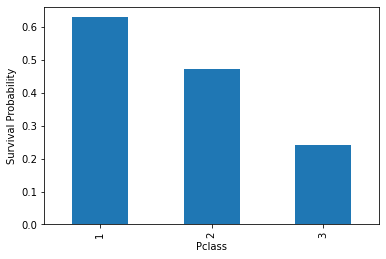

In [102]:
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')


In [105]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [106]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [103]:
#Create a new feature 'Family size' from the features 'SibSp' and 'Parch'

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,female,male,FamilySize
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,2
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,1,0,2
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,3,1,0,2
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,2,0,1,1


In [107]:
df.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,female,male,FamilySize
886,887,0,2,27.0,0,0,211536,13.00,NaN,S,4,0,1,1
887,888,1,1,19.0,0,0,112053,30.00,B42,S,1,1,0,1
888,889,0,3,NaN,1,2,W./C. 6607,23.45,NaN,S,1,1,0,4
889,890,1,1,26.0,0,0,111369,30.00,C148,C,2,0,1,1
890,891,0,3,32.0,0,0,370376,7.75,NaN,Q,2,0,1,1


In [108]:
#transformation(Categorical encoding using One-Hot-Encoder)
y = pd.get_dummies(df["Embarked"])
df=df.drop("Embarked", axis = 1) 
df=df.join(y) 
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,female,male,FamilySize,C,Q,S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,2,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,3,1,0,2,1,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,1,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,3,1,0,2,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,2,0,1,1,0,0,1


In [110]:
#Normalisation 0 and 1
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df[['Age']])

# Transform the data using the fitted scaler
df['Age_MM'] = MM_scaler.fit_transform(df[['Age']])

# Compare the origional and transformed column
print(df[['Age_MM', 'Age']].head())

     Age_MM   Age
0  0.271174  22.0
1  0.472229  38.0
2  0.321438  26.0
3  0.434531  35.0
4  0.434531  35.0


In [111]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,female,male,FamilySize,C,Q,S,Age_MM
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,2,0,0,1,0.271174
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,3,1,0,2,1,0,0,0.472229
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,1,0,0,1,0.321438
3,4,1,1,35.0,1,0,113803,53.1000,C123,3,1,0,2,0,0,1,0.434531
4,5,0,3,35.0,0,0,373450,8.0500,NaN,2,0,1,1,0,0,1,0.434531


### Titanic / Logistic Regression Part :

In [122]:
##Importing libraries and reading dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,female,male,FamilySize,C,Q,S,Age_MM
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,2,0,0,1,0.271174
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,3,1,0,2,1,0,0,0.472229
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,1,0,0,1,0.321438
3,4,1,1,35.0,1,0,113803,53.1000,C123,3,1,0,2,0,0,1,0.434531
4,5,0,3,35.0,0,0,373450,8.0500,NaN,2,0,1,1,0,0,1,0.434531


In [131]:
X = df[[ 'Pclass', 'Age_MM',
       'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Title', 'female', 'male']]
y = df['Survived']


In [132]:
#Splitting Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7802690582959642


Classification accuracy is 78%

In [135]:
print(metrics.accuracy_score(y_test, y_pred), y_pred[:10])

0.7802690582959642 [0 0 0 1 1 0 1 1 0 1]


In [145]:
y_proba  = logreg.predict_proba(x_test)
y_pred  = logreg.predict(x_test) 
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred), y_proba[:10])

0.7802690582959642 [[0.80491533 0.19508467]
 [0.80491533 0.19508467]
 [0.80491533 0.19508467]
 [0.25217427 0.74782573]
 [0.25217427 0.74782573]
 [0.80491533 0.19508467]
 [0.25217427 0.74782573]
 [0.25217427 0.74782573]
 [0.80491533 0.19508467]
 [0.25217427 0.74782573]]


In [146]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    139
1     84
Name: Survived, dtype: int64

In [147]:
# calculate the percentage of ones
y_test.mean()

0.37668161434977576

In [148]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6233183856502242

In [149]:
#Comparing the true and predicted response values

# print the first 25 true and predicted responses
print('True:', y_test.values[0:30])
print('False:', y_pred[0:30])

True: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0]
False: [0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1]


###  Confusion matrix
Table that describes the performance of a classification model

In [156]:
print(metrics.confusion_matrix(y_test, y_pred))

[[115  24]
 [ 25  59]]


True Positives (TP): 59

True Negatives (TN): 115

False Positives (FP): 24

False Negatives (FN): 25

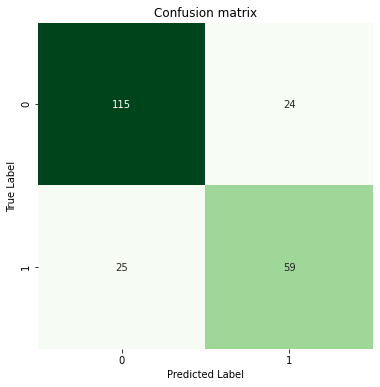

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

What we actually see in the figure above is how the data is predicted. For example, here we got 25 survived passengers which are predicted as not survived. Also , we have 24 not survived passengers yet predicted as survived.

Confusion matrix gives you a more complete picture of how your classifier is performing.


In [50]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[115  24]
 [ 25  59]]


### Metrics computed from a confusion matrix

In [51]:
#Classification Accuracy:how often is the classifier correct?

print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7802690582959642
0.7802690582959642


In [52]:
#Classification Error: 

classification_error = (FP + FN) / (TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.21973094170403587
0.21973094170403584


In [53]:
#Sensitivity: True Positive Rate or Recall 

sensitivity = TP / (FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.7023809523809523
0.7023809523809523


In [54]:
#specificity 
specificity = TN / (TN + FP)

print(specificity)

0.8273381294964028


Highly specific
Not sensitive

In [55]:
#False Positive Rate: 
false_positive_rate = FP / (TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.17266187050359713
0.17266187050359716


In [56]:
#Precision: 
#How "precise" is the classifier when predicting positive instances?
precision = TP / (TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7108433734939759
0.7108433734939759


### ROC AUC

ROC AUC Curve
Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
AUC is the percentage of the ROC plot that is underneath the curve

In [57]:
print(metrics.roc_auc_score(y_test, y_pred))

0.7648595409386776


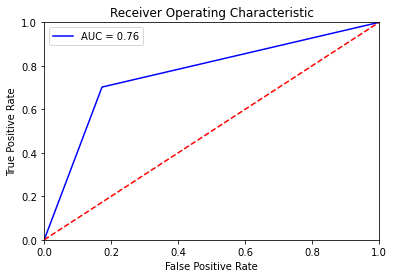

In [58]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Decision Tree

In [165]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [166]:
#features extraction

X = df[[ 'Pclass', 'Age_MM',
       'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Title', 'female', 'male']]
y = df['Survived']

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8212290502793296


[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.477\nsamples = 712\nvalue = [432, 280]'),
 Text(83.7, 54.360000000000014, 'gini = 0.318\nsamples = 454\nvalue = [364, 90]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.388\nsamples = 258\nvalue = [68, 190]')]

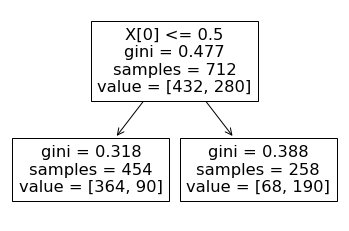

In [167]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

tree.plot_tree(clf) 



[Text(167.4, 163.07999999999998, 'X[0] <= 0.971\nentropy = 0.967\nsamples = 712\nvalue = [432, 280]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.718\nsamples = 454\nvalue = [364, 90]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.832\nsamples = 258\nvalue = [68, 190]')]

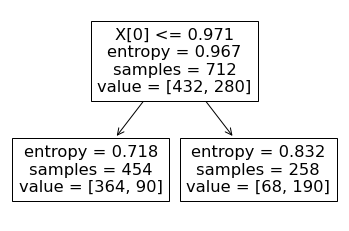

In [168]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", splitter="random")
clf = clf.fit(x_train, y_train)

tree.plot_tree(clf) 


### Random Forest 

In [68]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

77.81